# INTRODUÇÃO À BIBLIOTECA

A biblioteca presente neste repositório (`optical`) consiste num conjunto de rotinas computacionais para a solução do problema de valor de contorno do tipo Dirichlet definido pela equação de onda em (2 + 1) dimensões,
$$
    \imath\partial_z\psi(\mathbf{r}, z) = \frac{1}{2\kappa}\nabla^2_\perp\psi(\mathbf{r}, z) + \Delta{n}(\mathbf{r},z)\psi(\mathbf{r},z) + \mathcal{N}(\psi(\mathbf{r},z))\psi(\mathbf{r},z)\text{,}
$$
ademais à condição de contorno definida no plano $z = 0$ $\mu{m}$, sendo
$$
    \psi(\mathbf{r}.z = 0) = \psi_{z = 0}(\mathbf{r})\text{,}
$$
o que denominamos como perfil inicial do feixe.

In [1]:
# muda o diretório, sem output, para computational-beam-optics/
%cd -q ../../

## CONSTRUÇÃO DE PERFIS INICIAIS

A utilidade mais fundamental da biblioteca `optical` é a computação de perfis iniciais de luz. Para efetuar tal computação, conhecendo a forma da função de onda $\psi(\mathbf{r}, z)$ no plano $z = 0$ $\mu{m}$, podemos utilizar a função `create` do submódulo `beam` da biblioteca `optical` para computá-lo numa região finita do plano.

In [2]:
# módulo optical.beam: construtores de perfis iniciais
from optical import beam

# módulo numpy: computação geral de matrizes
import numpy as np                  # importa numpy como "np"

# construção da partição dos eixos do plano transversal
x = np.linspace(-40.,+40.,500);     # particiona (-40,+40) em 500 pontos
y = np.linspace(-40.,+40.,500);     # particiona (-40,+40) em 500 pontos

# construção da malha de pontos
X, Y = np.meshgrid(x, y);           # malha de pontos do plano

### PARÂMETROS OBRIGATÓRIOS

A função `optical.beam.create` pode ser usada da seguinte forma, sabendo o perfil inicial $\psi(\mathbf{r},z = 0) = U(\mathbf{r})$ do feixe.

> `optical.beam.create(F = lambda x, y: U(x, y), region = (X,Y))`
> 
> > computa o perfil $U(x,y)$ nos pontos da malha `(X, Y)` como uma matriz bidimensional (`numpy.ndarray`) de entradas complexas (`numpy.complex128`).

In [3]:
# construção do perfil inicial de um feixe de luz
psi_0 = beam.create(
    F = lambda x,y: np.exp(-(x**2.+y**2.)/10.**2) * np.exp(1.j * np.sqrt(x**2.+y**2.)),
    region = (X, Y)
);

#### INTENSIDADE E FASE DO FEIXE

As propriedades mais importantes a se mensurar de um feixe, são sua intensidade $|\psi(\mathbf{r},z)|$ e sua fase $\operatorname{arg}\{\psi(\mathbf{r},z)\}$, que podemos representar graficamente com o auxílio do submódulo `pyplot` da biblioteca `matplotlib`.

In [4]:
# módulo matplotlib.pyplot: construção de representações gráficas
import matplotlib.pyplot as plt     # importa pyplot como "plt"

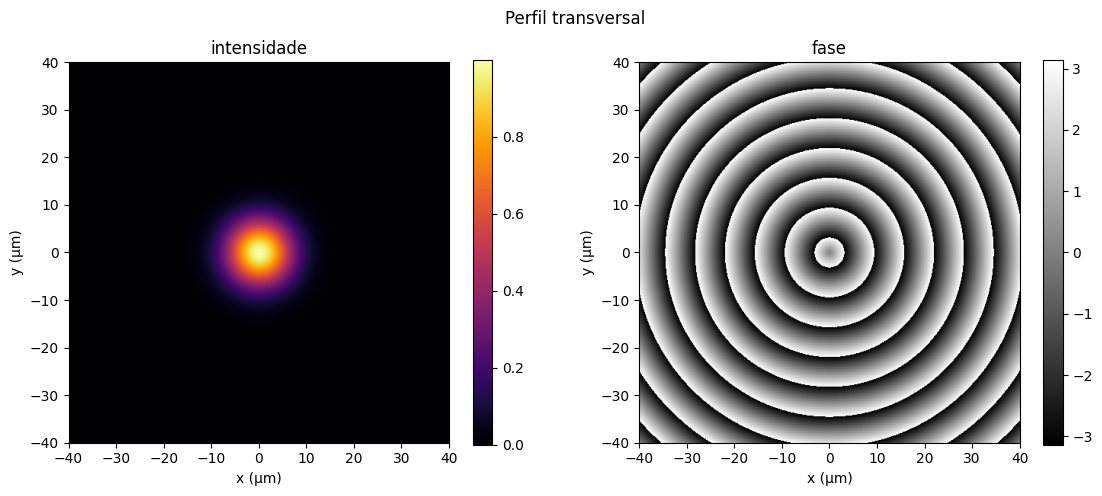

In [5]:
# exibe as imagens geradas em linha
%matplotlib inline

# cria a figura com dois subplots de tamanho (13.5, 5.0) em inches
fig, ax = plt.subplots(1, 2, figsize = (13.5, 5.0));
fig.suptitle('Perfil transversal');

# criação de gráfico no primeiro quadro
grafico = ax[0].imshow(
    np.abs(psi_0) ** 2,             # com valores de intensidade
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    cmap = 'inferno'                # com mapa de cores 'inferno'
);
# insere a barra de cores da intensidade na figura
fig.colorbar(grafico);
# insere o título do primeiro quadro
ax[0].set_title('intensidade');
# renomeia os eixos do primeiro quadro
ax[0].set_xlabel('x (μm)');
ax[0].set_ylabel('y (μm)');

# criação de gráfico no segundo quadro
grafico = ax[1].imshow(
    np.angle(psi_0),                # com valores de fase
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    vmin = -np.pi,                  # gradação mínima em -pi
    vmax = +np.pi,                  # gradação máxima em +pi
    cmap = 'gray'                   # com mapa de cores 'gray'
);
# inserir a barra de cores da fase na figura
fig.colorbar(grafico);
# insere o título do segundo quadro
ax[1].set_title('fase');
# renomeia os eixos do segundo quadro
ax[1].set_xlabel('x (μm)');
ax[1].set_ylabel('y (μm)');

### PARÂMETROS OPCIONAIS

A função `optical.beam.create` possui alguns argumentos opcionais, para facilitar a computação dos perfis iniciais.

#### CENTRO DO FEIXE

Podemos informar o centro do perfil inicial pelo parâmetro

> `center = (x_0, y_0)`
> > informa o par abcissa-ordenada do ponto no plano em que o feixe está centrado.

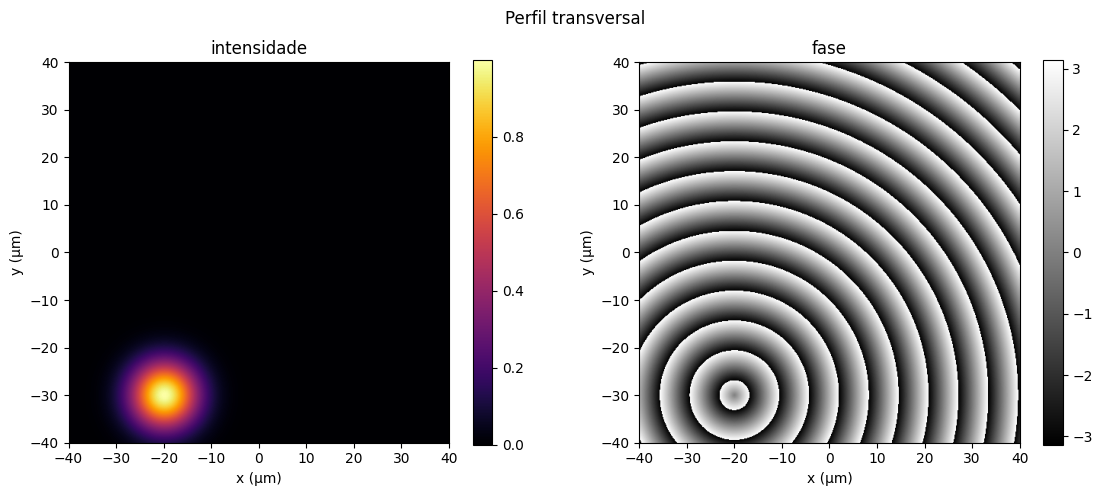

In [6]:
# exibe as imagens geradas em linha
%matplotlib inline

# construção do perfil inicial de um feixe de luz deslocado
psi_0 = beam.create(
    F = lambda x,y: np.exp(-(x**2.+y**2.)/10.**2) * np.exp(1.j * np.sqrt(x**2.+y**2.)),
    region = (X, Y),
    center = (-20., +30.)
);

# cria a figura com dois subplots de tamanho (13.5, 5.0) em inches
fig, ax = plt.subplots(1, 2, figsize = (13.5, 5.0));
fig.suptitle('Perfil transversal');

# criação de gráfico no primeiro quadro
grafico = ax[0].imshow(
    np.abs(psi_0) ** 2,             # com valores de intensidade
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    cmap = 'inferno'                # com mapa de cores 'inferno'
);
# insere a barra de cores da intensidade na figura
fig.colorbar(grafico);
# insere o título do primeiro quadro
ax[0].set_title('intensidade');
# renomeia os eixos do primeiro quadro
ax[0].set_xlabel('x (μm)');
ax[0].set_ylabel('y (μm)');

# criação de gráfico no segundo quadro
grafico = ax[1].imshow(
    np.angle(psi_0),                # com valores de fase
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    vmin = -np.pi,                  # gradação mínima em -pi
    vmax = +np.pi,                  # gradação máxima em +pi
    cmap = 'gray'                   # com mapa de cores 'gray'
);
# inserir a barra de cores da fase na figura
fig.colorbar(grafico);
# insere o título do segundo quadro
ax[1].set_title('fase');
# renomeia os eixos do segundo quadro
ax[1].set_xlabel('x (μm)');
ax[1].set_ylabel('y (μm)');

#### PERFIL ADICIONAL DE FASE

Podemos informar uma fase adicional do perfil inicial pelo parâmetro

> `phase`
> > informa a fase ao longo do plano.

essa pode corresponder a um valor numérico (`np.float128`), uma matriz (`np.ndarray`), possuindo o mesmo tamanho da malha - `(len(x), len(y))`, ou uma função (`np.ufunc`) - todas evaluadas como números reais.

##### VALOR NUMÉRICO DA FASE

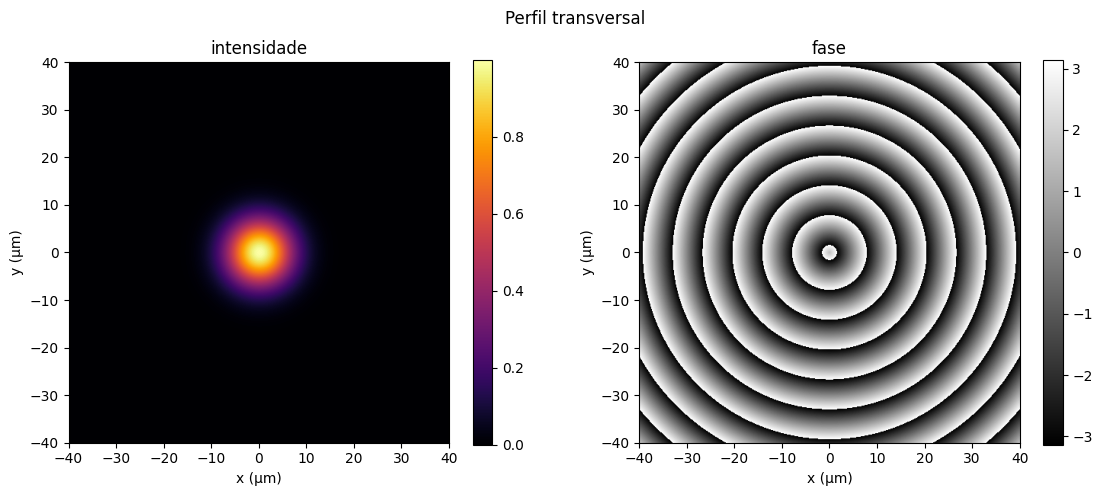

In [7]:
# exibe as imagens geradas em linha
%matplotlib inline

# construção do perfil inicial de um feixe de luz com fase constante
psi_0 = beam.create(
    F = lambda x,y: np.exp(-(x**2.+y**2.)/10.**2) * np.exp(1.j * np.sqrt(x**2.+y**2.)),
    region = (X, Y),
    phase = np.pi / 2.
);

# cria a figura com dois subplots de tamanho (13.5, 5.0) em inches
fig, ax = plt.subplots(1, 2, figsize = (13.5, 5.0));
fig.suptitle('Perfil transversal');

# criação de gráfico no primeiro quadro
grafico = ax[0].imshow(
    np.abs(psi_0) ** 2,             # com valores de intensidade
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    cmap = 'inferno'                # com mapa de cores 'inferno'
);
# insere a barra de cores da intensidade na figura
fig.colorbar(grafico);
# insere o título do primeiro quadro
ax[0].set_title('intensidade');
# renomeia os eixos do primeiro quadro
ax[0].set_xlabel('x (μm)');
ax[0].set_ylabel('y (μm)');

# criação de gráfico no segundo quadro
grafico = ax[1].imshow(
    np.angle(psi_0),                # com valores de fase
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    vmin = -np.pi,                  # gradação mínima em -pi
    vmax = +np.pi,                  # gradação máxima em +pi
    cmap = 'gray'                   # com mapa de cores 'gray'
);
# inserir a barra de cores da fase na figura
fig.colorbar(grafico);
# insere o título do segundo quadro
ax[1].set_title('fase');
# renomeia os eixos do segundo quadro
ax[1].set_xlabel('x (μm)');
ax[1].set_ylabel('y (μm)');

##### MATRIZ COM PERFIL DE FASE

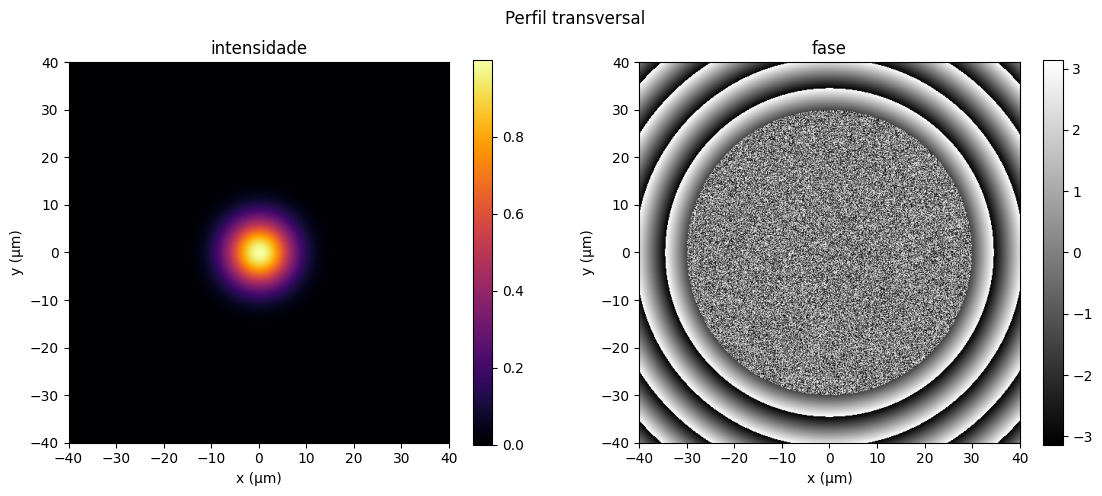

In [8]:
# exibe as imagens geradas em linha
%matplotlib inline

# construção do perfil inicial de um feixe de luz com fase constante
psi_0 = beam.create(
    F = lambda x,y: np.exp(-(x**2.+y**2.)/10.**2) * np.exp(1.j * np.sqrt(x**2.+y**2.)),
    region = (X, Y),
    # perfil de fase que para todo ponto
    phase = np.where(
        X**2 + Y**2 < 30.**2,       # num circulo de raio 30
        # corresponde a uma fase aleatória entre -pi e +pi
        2. * np.pi * (np.random.rand(len(x), len(y)) - 0.5),
        # é constantemente nula para quaisquer outros pontos
        0.
    )
);

# cria a figura com dois subplots de tamanho (13.5, 5.0) em inches
fig, ax = plt.subplots(1, 2, figsize = (13.5, 5.0));
fig.suptitle('Perfil transversal');

# criação de gráfico no primeiro quadro
grafico = ax[0].imshow(
    np.abs(psi_0) ** 2,             # com valores de intensidade
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    cmap = 'inferno'                # com mapa de cores 'inferno'
);
# insere a barra de cores da intensidade na figura
fig.colorbar(grafico);
# insere o título do primeiro quadro
ax[0].set_title('intensidade');
# renomeia os eixos do primeiro quadro
ax[0].set_xlabel('x (μm)');
ax[0].set_ylabel('y (μm)');

# criação de gráfico no segundo quadro
grafico = ax[1].imshow(
    np.angle(psi_0),                # com valores de fase
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    vmin = -np.pi,                  # gradação mínima em -pi
    vmax = +np.pi,                  # gradação máxima em +pi
    cmap = 'gray'                   # com mapa de cores 'gray'
);
# inserir a barra de cores da fase na figura
fig.colorbar(grafico);
# insere o título do segundo quadro
ax[1].set_title('fase');
# renomeia os eixos do segundo quadro
ax[1].set_xlabel('x (μm)');
ax[1].set_ylabel('y (μm)');

##### FASE EM FUNÇÃO DAS COORDENADAS

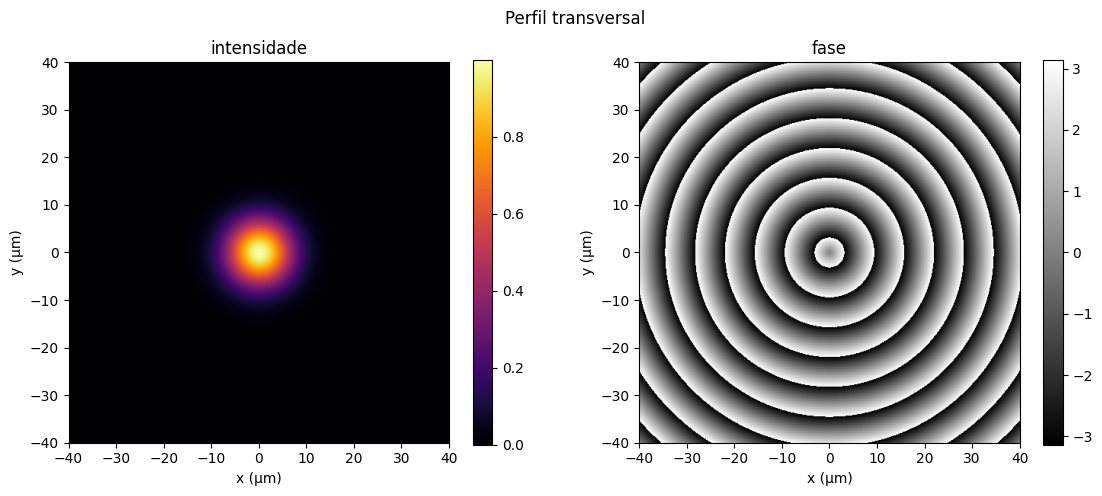

In [9]:
# exibe as imagens geradas em linha
%matplotlib inline

# construção do perfil inicial de um feixe de luz com fase constante
psi_0 = beam.create(
    F = lambda x,y: np.exp(-(x**2.+y**2.)/10.**2),
    region = (X, Y),
    # perfil de fase que para todo ponto
    phase = lambda x, y: np.sqrt(x**2.+y**2.)
);

# cria a figura com dois subplots de tamanho (13.5, 5.0) em inches
fig, ax = plt.subplots(1, 2, figsize = (13.5, 5.0));
fig.suptitle('Perfil transversal');

# criação de gráfico no primeiro quadro
grafico = ax[0].imshow(
    np.abs(psi_0) ** 2,             # com valores de intensidade
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    cmap = 'inferno'                # com mapa de cores 'inferno'
);
# insere a barra de cores da intensidade na figura
fig.colorbar(grafico);
# insere o título do primeiro quadro
ax[0].set_title('intensidade');
# renomeia os eixos do primeiro quadro
ax[0].set_xlabel('x (μm)');
ax[0].set_ylabel('y (μm)');

# criação de gráfico no segundo quadro
grafico = ax[1].imshow(
    np.angle(psi_0),                # com valores de fase
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    vmin = -np.pi,                  # gradação mínima em -pi
    vmax = +np.pi,                  # gradação máxima em +pi
    cmap = 'gray'                   # com mapa de cores 'gray'
);
# inserir a barra de cores da fase na figura
fig.colorbar(grafico);
# insere o título do segundo quadro
ax[1].set_title('fase');
# renomeia os eixos do segundo quadro
ax[1].set_xlabel('x (μm)');
ax[1].set_ylabel('y (μm)');

#### SISTEMA DE COORDENADAS

Podemos informar o sistema de coordenadas com o qual o perfil inicial (e a fase - caso essa seja passada como função) pelo parâmetro

> `coordinate_system`
> > informa o sistema de coordenadas do plano em `F` (e `phase` - caso seja uma função) é descrito.
>
> Podemos informar dois sistemas de coordenadas com o auxílio da constante `coordinate` do módulo `optical`
>
> > - **coordenadas cartesianas.** `coordinate.cartesian`
> > - **coordenadas polares.** `coordinate.polar`
>

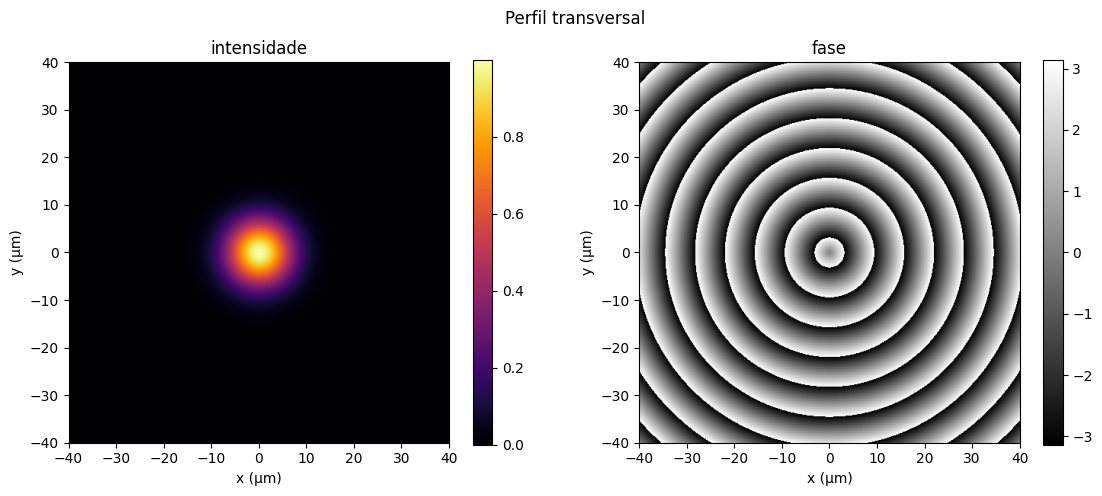

In [10]:
# exibe as imagens geradas em linha
%matplotlib inline

# importa a constante "coordinate" do módulo optical
from optical import coordinate

# construção do perfil inicial de um feixe de luz com fase constante
psi_0 = beam.create(
    F = lambda r,_: np.exp(-(r/10.)**2),
    region = (X, Y),
    # perfil de fase que para todo ponto
    phase = lambda r, _: r,
    coordinate_system = coordinate.polar
);

# cria a figura com dois subplots de tamanho (13.5, 5.0) em inches
fig, ax = plt.subplots(1, 2, figsize = (13.5, 5.0));
fig.suptitle('Perfil transversal');

# criação de gráfico no primeiro quadro
grafico = ax[0].imshow(
    np.abs(psi_0) ** 2,             # com valores de intensidade
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    cmap = 'inferno'                # com mapa de cores 'inferno'
);
# insere a barra de cores da intensidade na figura
fig.colorbar(grafico);
# insere o título do primeiro quadro
ax[0].set_title('intensidade');
# renomeia os eixos do primeiro quadro
ax[0].set_xlabel('x (μm)');
ax[0].set_ylabel('y (μm)');

# criação de gráfico no segundo quadro
grafico = ax[1].imshow(
    np.angle(psi_0),                # com valores de fase
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    vmin = -np.pi,                  # gradação mínima em -pi
    vmax = +np.pi,                  # gradação máxima em +pi
    cmap = 'gray'                   # com mapa de cores 'gray'
);
# inserir a barra de cores da fase na figura
fig.colorbar(grafico);
# insere o título do segundo quadro
ax[1].set_title('fase');
# renomeia os eixos do segundo quadro
ax[1].set_xlabel('x (μm)');
ax[1].set_ylabel('y (μm)');

#### VETOR DE ONDA DE INCIDÊNCIA

Podemos informar o vetor de onda com que a luz incide no plano $z = 0$ $\mu{m}$ pelo parâmetro

> `k = optical.wave_vector(k, angulation = (phi_x, phi_y))`
> > informa o vetor de onda com que a luz incide no plano.
>
> Para criar um vetor de onda podemos utilizar simplesmente o construtor `wave_vector` do módulo `optical` passando de argumentos o seu módulo `k` e seus ângulos `angulation`.

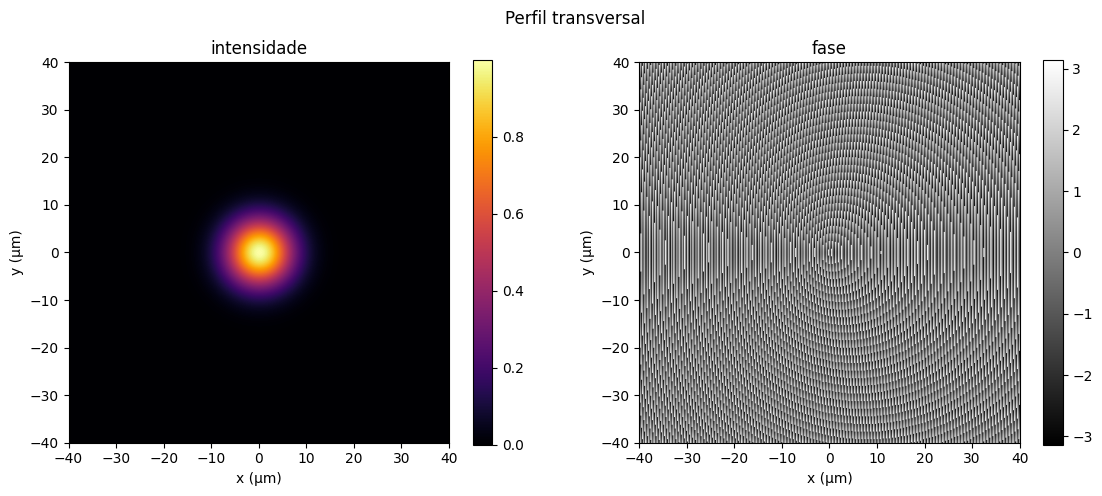

In [11]:
# exibe as imagens geradas em linha
%matplotlib inline

# importa o construtor "wave_vector" do módulo optical
from optical import wave_vector

# construção do perfil inicial de um feixe de luz com fase constante
psi_0 = beam.create(
    F = lambda x,y: np.exp(-(x**2.+y**2.)/10.**2) * np.exp(1.j * np.sqrt(x**2.+y**2.)),
    region = (X, Y),
    k = wave_vector(k = 10., angulation = (45., 0.))
);

# cria a figura com dois subplots de tamanho (13.5, 5.0) em inches
fig, ax = plt.subplots(1, 2, figsize = (13.5, 5.0));
fig.suptitle('Perfil transversal');

# criação de gráfico no primeiro quadro
grafico = ax[0].imshow(
    np.abs(psi_0) ** 2,             # com valores de intensidade
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    cmap = 'inferno'                # com mapa de cores 'inferno'
);
# insere a barra de cores da intensidade na figura
fig.colorbar(grafico);
# insere o título do primeiro quadro
ax[0].set_title('intensidade');
# renomeia os eixos do primeiro quadro
ax[0].set_xlabel('x (μm)');
ax[0].set_ylabel('y (μm)');

# criação de gráfico no segundo quadro
grafico = ax[1].imshow(
    np.angle(psi_0),                # com valores de fase
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    vmin = -np.pi,                  # gradação mínima em -pi
    vmax = +np.pi,                  # gradação máxima em +pi
    cmap = 'gray'                   # com mapa de cores 'gray'
);
# inserir a barra de cores da fase na figura
fig.colorbar(grafico);
# insere o título do segundo quadro
ax[1].set_title('fase');
# renomeia os eixos do segundo quadro
ax[1].set_xlabel('x (μm)');
ax[1].set_ylabel('y (μm)');

### OPERAÇÕES ENTRE PERFIS INICIAIS

Dado que o método `optical.beam.create` computa uma matriz bidimensional (`numpy.ndarray`) de entradas complexas, podemos utilizar todas as operações usuais entre matrizes (`+`,`-`,`*`,`/` e `**`) bem como as funções que atuam em variáveis desse tipo, como as rotinas disponibilizadas pelas bibliotecas [`numpy`](https://numpy.org/doc/stable/reference/) e [`scipy`](https://docs.scipy.org/doc/scipy/reference/index.html#scipy-api).

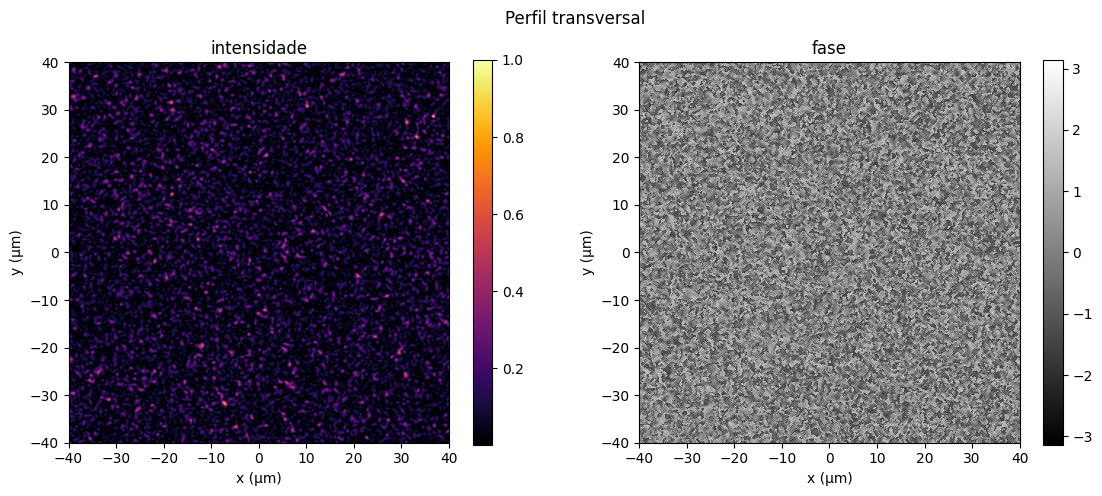

In [12]:
# exibe as imagens geradas em linha
%matplotlib inline

# importa as funções fft2 (transformada de Fourier) da biblioteca scipy
from scipy.fft import fft2

# construção do perfil inicial de um feixe de luz
psi_0 = beam.normalize(             # com intensidade normalizada
    fft2(                           # de uma transformada de Fourier
        beam.create(                # do um feixe genérico
            F = lambda r,_: np.exp(-(r/10.)**2) * np.exp(1.j * r),
            region = (X, Y),
            coordinate_system = coordinate.polar,
            # com fase aleatória entre -pi e +pi
            phase = 2. * np.pi * (np.random.rand(len(x), len(y)) - 0.5)
        )
    )
);

# cria a figura com dois subplots de tamanho (13.5, 5.0) em inches
fig, ax = plt.subplots(1, 2, figsize = (13.5, 5.0));
fig.suptitle('Perfil transversal');

# criação de gráfico no primeiro quadro
grafico = ax[0].imshow(
    np.abs(psi_0) ** 2,             # com valores de intensidade
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    cmap = 'inferno'                # com mapa de cores 'inferno'
);
# insere a barra de cores da intensidade na figura
fig.colorbar(grafico);
# insere o título do primeiro quadro
ax[0].set_title('intensidade');
# renomeia os eixos do primeiro quadro
ax[0].set_xlabel('x (μm)');
ax[0].set_ylabel('y (μm)');

# criação de gráfico no segundo quadro
grafico = ax[1].imshow(
    np.angle(psi_0),                # com valores de fase
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    vmin = -np.pi,                  # gradação mínima em -pi
    vmax = +np.pi,                  # gradação máxima em +pi
    cmap = 'gray'                   # com mapa de cores 'gray'
);
# inserir a barra de cores da fase na figura
fig.colorbar(grafico);
# insere o título do segundo quadro
ax[1].set_title('fase');
# renomeia os eixos do segundo quadro
ax[1].set_xlabel('x (μm)');
ax[1].set_ylabel('y (μm)');